# Data Wrangling 

### O que é Data Wrangling?


O termo data wrangling – também chamado de data preparation – significa preparação de dados. O conceito diz respeito ao ato de coletar, limpar, normalizar, combinar, estruturar e organizar os dados que serão analisados. Podemos dizer que esse processo tende a melhorar a qualidade dos dados para análise, e é fundamental.

Vamos realizar algumas etapas desse processo, utilizando um dataset automotivo que pode ser encontrado <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">[aqui]</a>.


In [3]:
import pandas as pd
import matplotlib.pylab as plt

In [5]:
filename = 'auto.csv'
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names = headers)

In [6]:
# Vamos dar uma olhada nos dados:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como podemos ver (logo nas primeiras linhas, na coluna 'normalized-losses'), vários pontos de interrogação apareceram no dataframe; esses são valores ausentes que podem prejudicar nossa análise.

Mas.. como identificamos todos esses valores ausentes e lidamos com eles?
Como trabalhar com dados perdidos? 

Primeiro, precisamos identificá-los:

### Identificando e tratando valores ausentes


<h4> Converter "?" para NaN </h4>

No conjunto de dados do carro, os dados ausentes vêm com o ponto de interrogação "?".
Substituímos "?" com NaN (Not a Number), que é o marcador de valor ausente padrão do Python, por razões de velocidade computacional e conveniência. Aqui usamos a função:
  <pre> .replace (A, B, inplace = True) </pre>


O .replace vai substituir, em todo dataframe, o valor de A por B. O inplace vai fazer com que a cópia do dataframe que é gerada pelo .replace, já com os valores trocados, seja atríbuida ao datafreme, sem criar um novo

In [7]:
import numpy as np

# substituindo "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4> Avaliação de dados ausentes </h4>

Usamos as funções a seguir para identificar os valores ausentes em um dataframe. Existem dois métodos para detectar dados ausentes:

<ol>
     <li><b>.isnull()</b> </li> 
     <li><b>.notnull()</b> </li>
</ol>

In [9]:
missing_data = df.isnull()
missing_data.head(5)
# A saída é um valor booleano que indica se o valor que é passado para o argumento contém de fato dados ausentes.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h4> Contando os valores ausentes em cada coluna </h4>
<p>
Usando um loop podemos descobrir rapidamente o número de valores ausentes em cada coluna. Conforme mencionado acima, "True" representa um valor ausente, "False" significa que o valor está presente no conjunto de dados. No corpo do loop, o método ".value_counts ()" conta o número de valores "True".
</p>

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts(),'\n') 

symboling
False    205
Name: symboling, dtype: int64 

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64 

make
False    205
Name: make, dtype: int64 

fuel-type
False    205
Name: fuel-type, dtype: int64 

aspiration
False    205
Name: aspiration, dtype: int64 

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64 

body-style
False    205
Name: body-style, dtype: int64 

drive-wheels
False    205
Name: drive-wheels, dtype: int64 

engine-location
False    205
Name: engine-location, dtype: int64 

wheel-base
False    205
Name: wheel-base, dtype: int64 

length
False    205
Name: length, dtype: int64 

width
False    205
Name: width, dtype: int64 

height
False    205
Name: height, dtype: int64 

curb-weight
False    205
Name: curb-weight, dtype: int64 

engine-type
False    205
Name: engine-type, dtype: int64 

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64 

engine-size
False    205
Name: engine-size, dtype: int64

Com base no resumo acima, cada coluna tem 205 linhas de dados, sete colunas contendo dados ausentes:

<ol>
     <li> "normalized-losses": 41 dados ausentes </li>
     <li> "num-of-doors": 2 dados ausentes </li>
     <li> "bore": 4 dados ausentes </li>
     <li> "stroke": 4 dados ausentes </li>
     <li> "horsepower": 2 dados ausentes </li>
     <li> "peak-rpm": 2 dados ausentes </li>
     <li> "price": 4 dados ausentes </li>
</ol>

<b> O que fazer com os dados ausentes? </b>

<ol>
     <li> deletar os dados <br>
         a. deletar toda a linha <br>
         b. deletar toda a coluna
     </li>
     <li> substituir os dados <br>
         a. substituir pela média <br>
         b. substituir pela frequência <br>
         c. substituir com base em outras funções
     </li>
</ol>

Colunas inteiras devem ser eliminadas apenas se a maioria das entradas na coluna estiver vazia. Em nosso conjunto de dados, nenhuma das colunas está vazia o suficiente para ser totalmente descartada.
Temos alguma liberdade para escolher qual método substituir os dados; no entanto, alguns métodos podem parecer mais razoáveis ​​do que outros.


Vamos aplicar diferentes métodos:



<b> Substituiremos pela média: </b>

<ul>
    <li> "normalized-losses": 41 dados ausentes</li>
    <li> "stroke": 4 dados ausentes</li>
    <li> "bore": 4 dados ausentes</li>
    <li> "horsepower": 2 dados ausentes</li>
    <li> "peak-rpm": 2 dados ausentes</li>
</ul>

<b> Substituiremos por frequência: </b>

<ul>
    <li> "num-of-doors": 2 dados ausentes. (substituiremos os valores ausentes por 4).
        <ul>
            <li> Motivo: 84% sedans são quatro portas. Como quatro portas é o mais frequente, é mais provável que ocorra </li>
        </ul>
    </li>
</ul>

<b> Deletar a linha inteira: </b>

<ul>
    <li> "price": 4 dados ausentes, podemos excluir a linha inteira
        <ul>
            <li> Motivo: o preço é o que queremos prever. Qualquer entrada de dados sem dados de preços não pode ser usada para previsão; portanto, qualquer linha agora sem dados de preço não é útil para nós </li>
        </ul>
    </li>
</ul>

<h4> Calcular a média de uma coluna </h4>

In [12]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4> Substituir "NaN" pelo valor médio na coluna "normalized-losses" </h4>

In [13]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4> Repetindo o processo para todas as outras colunas que aplicaremos esse método: </h4>

In [15]:
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [16]:
# Agora substituindo o valor ausente em "num-of-doors" por 4, que é o valor que mais aparece nessa coluna.
# (para identificar o valor que mais aparece, pode-se utilizar a função .value_counts())

df['num-of-doors'].value_counts()


four    114
two      89
Name: num-of-doors, dtype: int64

In [17]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [18]:
# Agora, vamos deletar a coluna inteira, onde o valor de "price" é NaN
df.dropna(subset=["price"], axis=0, inplace=True)

# Como deletamos 2 linhas, vamos reiniciar nossos indices
df.reset_index(drop=True, inplace=True)

In [19]:
# Vamos agora analisar os dados após os tratamentos
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3> Formato dos dados </h3>

<p> A última etapa da limpeza de dados é verificar e certificar-se de que todos os dados estejam no formato correto (int, float, texto ou outro). </p>

No Pandas, usamos

<p> <b> .dtype () </b> para verificar o tipo de dados </p>
<p> <b> .astype () </b> para alterar o tipo de dados </p>

In [20]:
# Vamos verificar os tipos de cada coluna
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p> Como podemos ver acima, algumas colunas não são do tipo de dados correto. Variáveis numéricas devem ter tipo 'float' ou 'int', e variáveis com strings como categorias devem ter tipo 'objeto'. Por exemplo, as variáveis 'bore' e 'stroke' são valores numéricos que descrevem os motores, portanto, devemos esperar que sejam do tipo 'float' ou 'int'; no entanto, eles são mostrados como tipo 'objeto'. Temos que converter os tipos de dados em um formato adequado para cada coluna usando o método "astype ()". </p>

<h4>Convertendo os dados para o formato correto:</h4>


In [33]:
# Explicitamos a coluna e dizemos qual será o novo tipo de dados dela
# Por que existem 2 colchetes na solução?
# O colchete de fora, indica ao dataframe que utilizaremos uma coluna, e não o dataframe todo
# O colchete de dentro apresenta a lista de colunas que iremos utilizar (mesmo que essa lista seja de 1 elemento)

df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["horsepower"]] = df[["horsepower"]].astype("int")

df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

# Podemos indicar várias colunas ao mesmo tempo, quando elas possuírem o mesmo tipo de dado
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")


In [34]:
# Vamos verificar novamente o tipo de cada coluna:

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
dtype: object

Agora, temos um conjunto de dados sem valores ausentes e com os dados em formatos corretos.

<h2> Padronização de Dados (standardization) </h2>
<p>
Os dados são geralmente coletados de diferentes fontes e com formatos diferentes. A padronização dos dados é o processo de transformar dados em um formato comum que permite ao pesquisador fazer uma comparação significativa. Normalizar os dados (subtraindo a média e dividindo pelo desvio padrão), por exemplo, é um tipo de padronização dos dados.
</p>

<b> Exemplo </b>

<p> Transforme mpg em L/100km: </p>
<p> Em nosso conjunto de dados, as colunas de consumo de combustível "city-mpg" e "highway-mpg" são representadas pela unidade de mpg (milhas por galão). Suponha que estejamos desenvolvendo um aplicativo em um país que aceita o consumo de combustível com padrão L/100km </p>
<p> Precisamos aplicar <b> transformação de dados </b> para transformar mpg em L/100km? </p>

<p> A fórmula para conversão de unidades é <p>
L/100km = 235/mpg
<p> Podemos fazer muitas operações matemáticas diretamente no Pandas. </p>

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [26]:
# Vamos converter mpg to L/100km  utilizando a fórmula proposta e atribuindo o resultado a uma nova coluna
df['city-L/100km'] = 235/df["city-mpg"]

# Vamos ver o resultado 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [29]:
# vamos aplicar a mesma fórmula a coluna highway-mpg, porém, substituindo seu valor sem criar uma coluna nova 
df["highway-mpg"] = 235/df["highway-mpg"]

# agora que a coluna possui o valor de L/100km não faz sentido seu nome ser "highway-mpg"
# vamos renomea-la
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# vamos dar uma olhada nos dados agora 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


<h2> Normalização de dados </h2>

<p> A normalização é o processo de transformar valores de várias variáveis em um intervalo semelhante. As normalizações típicas incluem dimensionar a variável para que a média da variável seja 0, dimensionar a variável para que a variância seja 1 ou dimensionar a variável para que os valores das variáveis variem de 0 a 1
</p>

<b> Exemplo </b>

<p> Para demonstrar a normalização, digamos que queremos dimensionar as colunas "comprimento", "largura" e "altura" </p>
<p> <b> Destino: </b> gostaria de normalizar essas variáveis para que seus valores variem de 0 a 1. </p>
<p> <b> Abordagem: </b> substitua o valor original por (valor original) / (valor máximo) </p>

In [31]:
# substituimos o valor original por (valor original)/(valor máximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

In [32]:
# exibir apenas as colunas que alteramos para ver o resultado
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h2> Binning (bucketing) </h2>
<p>
     Binning é um processo de transformação de variáveis numéricas contínuas em 'bins' categóricos discretos, para análise agrupada.
</p>

<b> Exemplo: </b>

<p> Em nosso conjunto de dados, "horsepower" é uma variável de valor real variando de 48 a 288, ela tem 57 valores únicos. E se nos preocupássemos apenas com a diferença de preço entre carros com alta, média e pequena potência (3 tipos)? Podemos reorganizá-los em três 'caixas' para simplificar a análise? </p>

<p> Usaremos o método Pandas 'cut' para segmentar a coluna de 'horsepower' em 3 caixas </p>

Text(0.5, 1.0, 'horsepower bins')

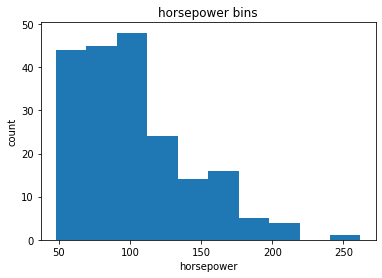

In [36]:
# Vamos plotar o histograma de horsepower, para ver como é a sua distribuição.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p> Gostaríamos de 3 bins de largura de banda de tamanho igual, então usamos a função <code> linspace (start_value, end_value, numbers_generated </code> de numpy. </p>
<p> Como queremos incluir o valor mínimo de horsepower, queremos definir start_value = min (df ["horsepower"]). </p>
<p> Como queremos incluir o valor máximo de horsepower, queremos definir end_value = max (df ["horsepower"]). </p>
<p> Como estamos construindo 3 caixas de igual comprimento, deve haver 4 divisores, portanto, numbers_generated = 4. </p>

In [37]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [40]:
# vamos criar o nome dos nossos rótulos
labels_list = ['Low', 'Medium', 'High']

In [41]:
# agora vamos aplicar a função "cut" indicando em qual "bin" cada valor de horsepower irá ficar
# vamos criar uma coluna nova para receber os valores discretos, mantendo a coluna com os valores continuos

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=labels_list, include_lowest=True )

In [43]:
# vamos verificar os registros para ver como ficou

df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [44]:
# vamos verificar a quantidade de veículos em cada bin

df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

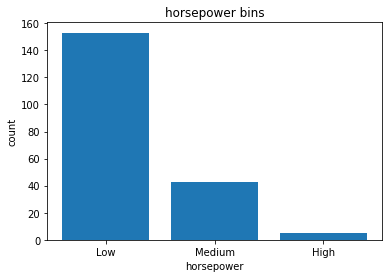

In [46]:
# e a visualização gráfica da distribuição
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(labels_list, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Podemos também usar um histograma, na váriavel contínua para visualizar a distribuição dos valores em "bins", apenas para visualização, sem criar uma coluna no dataframe para armazenar os valores

Text(0.5, 1.0, 'horsepower bins')

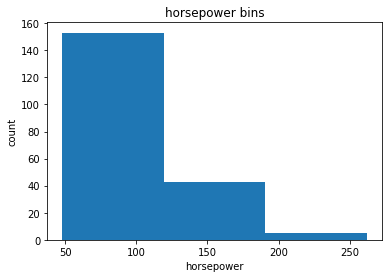

In [52]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# vc pode alterar o valor do parametro bins para ver os resultados das distriuições
plt.pyplot.hist(df["horsepower"], bins = 3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h2> Variável Dummy (ou variável fictícia) </h2>

<p>
     São variáveis numéricas para rotular categorias. Têm esse nome pois os números não tem um significado inerente, a não ser representar uma categoria.
</p>


<b> Exemplo </b>
<p>
     A coluna "fuel-type" tem dois valores exclusivos, "gás" ou "diesel". Se utilizarmos um modelo de regressão em nossos dados, veremos que eles não compreendem palavras (apenas números). Para usar esse atributo em uma análise de regressão, convertemos "fuel-type" em váriaveis indicadoras (dummys) do tipo: gás = 0 e diesel = 1
</p>

<p>
     Usaremos o método 'get_dummies' do pandas para atribuir valores numéricos a diferentes categorias de tipo de combustível.
</p>

In [55]:
# vai gerar um dataframe onde as colunas são as categorias de fuel-type 
# e os valores são 1 para True e 0 para False
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [56]:
# vamos renomear as colunas para melhorar o entendimento

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [57]:
# agora vamos unir os 2 dataframes
df = pd.concat([df, dummy_variable_1], axis=1)

In [58]:
# e verificar o resultado
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [59]:
# Vamos repetir esse processo para a coluna aspiration que possui 2 categorias também: std e turbo

df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [61]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)

In [62]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [63]:
# agora vamos armazenar o novo datraframe, com todos os tratamentos que fizemos
# em um arquivo .csv para ser utilizado em análises futuras

df.to_csv('clean_auto_df.csv')

# É isso!

### Este é apenas um exemplo de data wrangling, com pandas.
Este notebook faz parte de uma série de notebooks com conteúdos extraídos de cursos dos quais participei como aluno, ouvinte, professor, monitor... Reunidos para consulta futura e compartilhamento de idéias, soluções e conhecimento!

### Muito obrigado pela sua leitura!


<h4>Anderson Cordeiro</h4>

Você pode encontrar mais conteúdo no meu Medium<br> ou então entrar em contato comigo :D

<a href="https://www.linkedin.com/in/andercordeiro/" target="_blank">[LinkedIn]</a>
<a href="https://medium.com/@andcordeiro" target="_blank">[Medium]</a>
